## Exploratory Data Analysis

Working on: https://www.kaggle.com/c/google-quest-challenge/

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib_venn import venn2

In [6]:
data = Path('data')
train = data/'train.csv'
test = data/'test.csv'
sample = data/'sample_submission.csv'

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
sample_df = pd.read_csv(sample)

In [7]:
print("Train Rows", len(train_df))
print("Test Rows", len(test_df))

Train Rows 6079
Test Rows 476


In [8]:
train_df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [53]:
test_df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


## Unique Users

If all users are unique we probably don't care about the user columns. If they are not, then there may be some signal here.

In [9]:
# Surprisingly to me, there are duplicate users
print("Unique question user pages:", len(train_df['question_user_page'].unique()))

Unique question user pages: 3422


In [10]:
# Let's look at some of the duplicate users
train_df['question_user_page'].value_counts()[:5]

https://stats.stackexchange.com/users/5              12
https://programmers.stackexchange.com/users/48536    11
https://rpg.stackexchange.com/users/9552             11
https://programmers.stackexchange.com/users/8486     11
https://scifi.stackexchange.com/users/976            10
Name: question_user_page, dtype: int64

In [56]:
# Surprisingly to me, there are duplicate users
print("Unique answer user pages:", len(train_df['answer_user_page'].unique()))

Unique answer user pages: 4430


In [11]:
# Let's look at some of the duplicate users
train_df['answer_user_page'].value_counts()[:5]

https://tex.stackexchange.com/users/4427              17
https://graphicdesign.stackexchange.com/users/3270    16
https://magento.stackexchange.com/users/146           15
https://electronics.stackexchange.com/users/20218     14
https://mechanics.stackexchange.com/users/4152        11
Name: answer_user_page, dtype: int64

Let's see if there is any overlap between the training and test sets:

In [12]:
# Train set question askers overlapped with test set question askers
np.intersect1d(train_df['question_user_page'].unique(), test_df['question_user_page'].unique())

array(['https://salesforce.stackexchange.com/users/686'], dtype=object)

In [13]:
# Train set question answerers overlapped with test set question answerers
np.intersect1d(train_df['answer_user_page'].unique(), test_df['answer_user_page'].unique())

array([], dtype=object)

In [14]:
# Train set question askers overlapped with test set question answerers
np.intersect1d(train_df['question_user_page'].unique(), test_df['answer_user_page'].unique())

array(['https://anime.stackexchange.com/users/191',
       'https://anime.stackexchange.com/users/27',
       'https://anime.stackexchange.com/users/6166',
       'https://askubuntu.com/users/157447',
       'https://biology.stackexchange.com/users/948',
       'https://gaming.stackexchange.com/users/61976',
       'https://magento.stackexchange.com/users/3535',
       'https://wordpress.stackexchange.com/users/10097'], dtype=object)

In [15]:
# Train set question answerers overlapped with test set question askers
np.intersect1d(train_df['answer_user_page'].unique(), test_df['question_user_page'].unique())

array(['https://biology.stackexchange.com/users/1916',
       'https://blender.stackexchange.com/users/5505',
       'https://christianity.stackexchange.com/users/1003',
       'https://christianity.stackexchange.com/users/3889',
       'https://cooking.stackexchange.com/users/20183',
       'https://cooking.stackexchange.com/users/8305',
       'https://diy.stackexchange.com/users/15522',
       'https://gaming.stackexchange.com/users/3917',
       'https://judaism.stackexchange.com/users/732',
       'https://judaism.stackexchange.com/users/759',
       'https://mechanics.stackexchange.com/users/57',
       'https://tex.stackexchange.com/users/4301'], dtype=object)

So there is a little bit of overlap between test and training set, but not a ton.


Let's plot these overlap relations between the training and test set as venn diagrams.

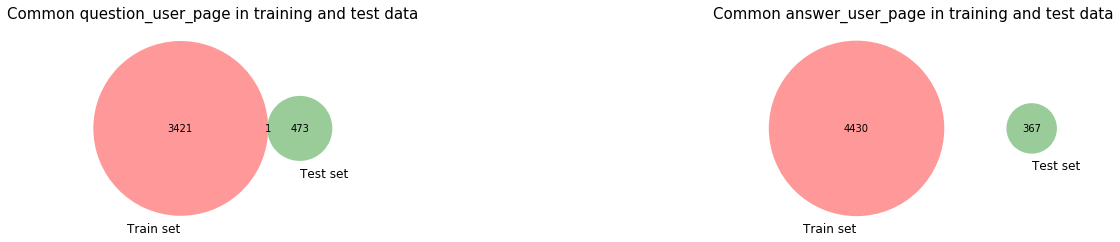

In [16]:
plt.figure(figsize=(23,13))

plt.subplot(321)
venn2([set(train_df.question_user_page.unique()), set(test_df.question_user_page.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common question_user_page in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(train_df.answer_user_page.unique()), set(test_df.answer_user_page.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common answer_user_page in training and test data", fontsize=15)
#plt.show()

plt.show()


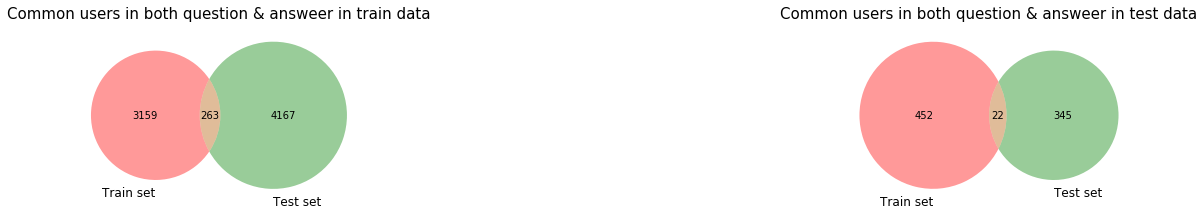

In [17]:
plt.figure(figsize=(23,13))


#plt.figure(figsize=(15,8))
plt.subplot(321)
venn2([set(train_df.question_user_page.unique()), set(train_df.answer_user_page.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in both question & answeer in train data", fontsize=15)

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(test_df.question_user_page.unique()), set(test_df.answer_user_page.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in both question & answeer in test data", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 0.9)


## Distribution of Target Variables

We can look at the distribution of target variables to get a sense for what ranges these values typically take. For starters, we can just summarize them with pandas.

In [18]:
targets = list(sample_df.columns[1:])
train_df[targets].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,...,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,...,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,...,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So we can see from the above that `question_asker_intent_understanding` has a pretty high mean value of `0.893` while others like `question_conversational` have a much lower mean value of `0.057`.

Why is this useful? First, it gives us some background intuition about the typical values for these targets. But more importantly, if we're disciplined data scientists, we will run the above code against the output predictions our model makes. When we do this we should pay close attentiont to areas in which the two distributions differ and think carefully about steps we might take to help them align.

The above can give us a general sense for each target variable, but we can go one step further and plot them to see the shapes of their distributions.

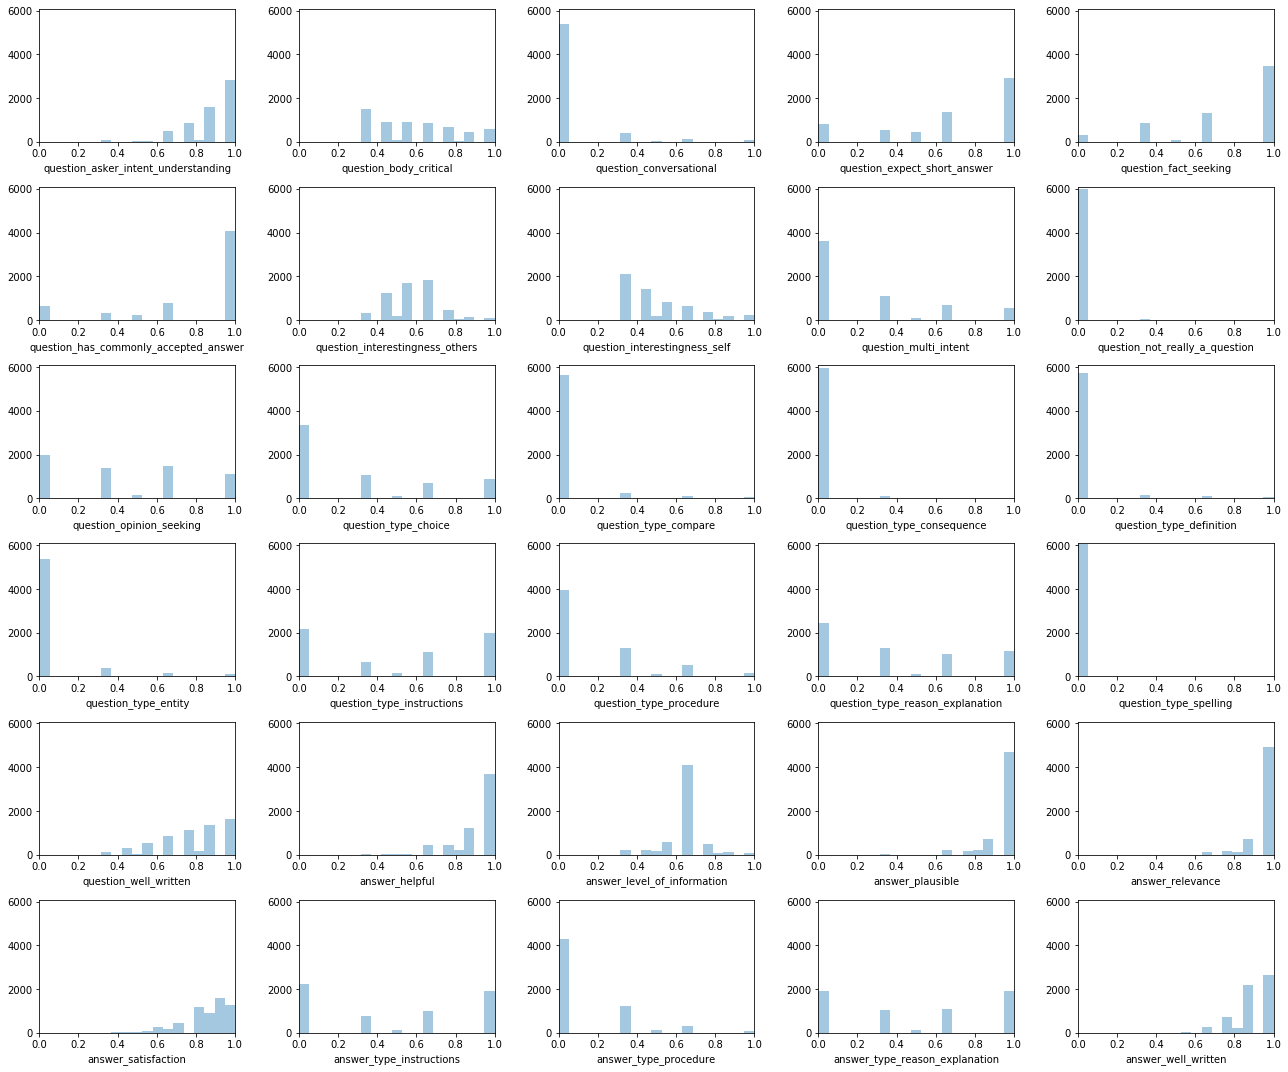

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(targets):
    ax = axes[i]
    sns.distplot(train_df[col], label=col, kde=False, bins=bins, ax=ax)
    # ax.set_title(col)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()
plt.close()

Once again if we're disciplined, we should run this code against our output predictions and look for problems. (They don't have to match, but occasionally mismatches might indicate a problem we should take a moment to think about)

## Investigate Host Websites

Is there any information that we can leverage based on the host website? Do some sites attract users with better spelling? Is there much overlap between the hosts in the training set and the test set?

In [20]:
# Train set question askers overlapped with test set question answerers
print("Unique hosts in train:", len(train_df['host'].unique()))
print("Unique hosts in test:", len(test_df['host'].unique()))
print("Intersecting hosts:", len(np.intersect1d(train_df['host'].unique(), test_df['host'].unique())))

Unique hosts in train: 63
Unique hosts in test: 55
Intersecting hosts: 54


So it looks like there's actually a lot of overlap between the training set hosts and those in the test set.

Next, let's look at the best and worst scores for each target when grouped by host. Do certain sites promote poor spelling? Opinion based questions? etc.

In [21]:
def group_by_host_and_get_score(df, column):
    grouped_df = df.groupby('host') \
       .agg(count=(column, 'size'), mean_score=(column, 'mean')) \
       .reset_index() \
       .sort_values(by='mean_score')
    
    return grouped_df

In [22]:
for target in targets:
    
    grouped_df = group_by_host_and_get_score(train_df, target)
    print('----------------------')
    print(target)
    print(grouped_df[:5])
    print(grouped_df[-5:])
    print()

----------------------
question_asker_intent_understanding
                                  host  count  mean_score
22  expressionengine.stackexchange.com     34    0.790850
31                    mathoverflow.net     82    0.837398
13            crypto.stackexchange.com     35    0.838095
18               dsp.stackexchange.com     29    0.842912
29              math.stackexchange.com    187    0.851456
                           host  count  mean_score
16        diy.stackexchange.com     97    0.965636
6     biology.stackexchange.com     53    0.968553
12    cooking.stackexchange.com     67    0.978441
36  meta.math.stackexchange.com      2    1.000000
33           meta.askubuntu.com      2    1.000000

----------------------
question_body_critical
                                  host  count  mean_score
45          robotics.stackexchange.com      2    0.333333
11        codereview.stackexchange.com     39    0.367521
22  expressionengine.stackexchange.com     34    0.460784
18      

----------------------
answer_type_instructions
                                   host  count  mean_score
39             movies.stackexchange.com     30    0.000000
33                   meta.askubuntu.com      2    0.000000
34  meta.christianity.stackexchange.com      4    0.000000
35    meta.codereview.stackexchange.com      2    0.000000
2               anime.stackexchange.com     21    0.015873
                            host  count  mean_score
4                  askubuntu.com    126    0.765873
11  codereview.stackexchange.com     39    0.777778
62   wordpress.stackexchange.com     81    0.794239
56         tex.stackexchange.com    140    0.804762
17      drupal.stackexchange.com     98    0.819728

----------------------
answer_type_procedure
                                   host  count  mean_score
35    meta.codereview.stackexchange.com      2     0.00000
36          meta.math.stackexchange.com      2     0.00000
34  meta.christianity.stackexchange.com      4     0.00000
33  

## Question and Answer Lengths

Approximately how many words are present in each question and answer? This may end up being important when we decide how long of sentences we would like to feed to our model.

In [16]:
num_words_title = train_df['question_title'].apply(lambda x: len(x.split()))
num_words_question = train_df['question_body'].apply(lambda x: len(x.split()))
num_words_answer = train_df['answer'].apply(lambda x: len(x.split()))

count    6079.000000
mean        9.034874
std         3.775639
min         2.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        28.000000
Name: question_title, dtype: float64


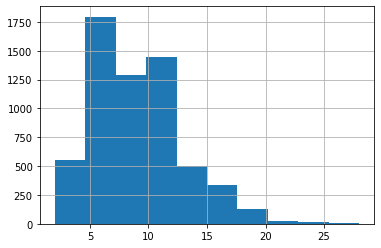

In [24]:
# Title
print(num_words_title.describe())
num_words_title.hist()

count    6079.000000
mean      125.263695
std       116.011233
min         0.000000
25%        55.000000
50%        92.000000
75%       154.000000
max      1416.000000
Name: question_body, dtype: float64


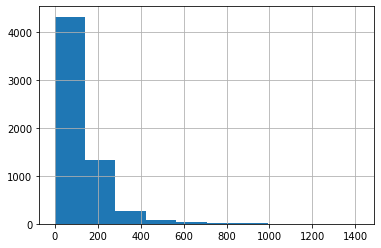

In [25]:
# Question Body
print(num_words_question.describe())
num_words_question.hist()

count    6079.000000
mean      133.022208
std       155.570789
min         3.000000
25%        47.000000
50%        88.000000
75%       163.000000
max      2376.000000
Name: answer, dtype: float64


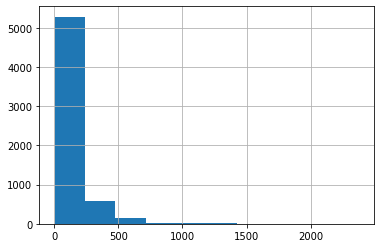

In [26]:
# Answer Body
print(num_words_answer.describe())
num_words_answer.hist()